<div align="center">

**Lab Report Title**  
*Field Effect Transistor Applications*

**Course:** ELECTRONICS 2 

**Date:** 28/05/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| ENESS xxxxxxx xxxxx        | xxxxxxx           |
| Elhama Adel         | 2756781           |


</div>

In [2]:
#Load all Import

%load_ext autoreload
%autoreload 2

# Introduction and Objective

*Briefly describe the purpose and objectives of the laboratory experiment.*

[Write your introduction here]



# Preparation

## Part 1: MOSFET as Switch 
**Objective:** Switch a 50 mA load at 5 V using a BS108 n-channel MOSFET driven by a 3.3 V PWM (50 % duty).

1. **Equivalent load resistance**  
   $$R_L = \frac{V_0}{I_D} = \frac{5\text{ V}}{50\text{ mA}} = {100\;\Omega}.$$

2. **Switching‐loss analysis**  
   - Instantaneous power:  $p(t) = v_{DS}(t)\cdot i_D(t).$ 
   
   - During each edge (rise/fall time $t_r = t_f = 20\text{ ns}$), approximate the overlap energy:  
     $$
       E_{\rm edge}
       \approx \frac{1}{6}\,V_0\cdot I_D \cdot t_{\rm edge}
       = \tfrac12\,(5\text{ V})(0.05\text{ A})(20\times10^{-9}\text{ s})
       = 0.83\times10^{-9}\text{ J}.
     $$  
   - Total switching energy per PWM period: $E_{\rm sw}=2E_{\rm edge}.$  
   - Average switching power:  
                              $$
                                P_{\rm sw} = E_{\rm sw}\,f_{\rm PWM}
                                = 1.66\times10^{-9}\,\text{J}\;\times f_{\rm PWM}.
                              $$ 
   - **Worst‐case** $p(t)$ peaks at mid‐transition (where $V_o$ and $I_D$ overlap most significantly) either on rising/falling edge:
        $$P_{peak}\approx \frac{V_0 \times I_D}{4} 
        = 62.5 mW
        $$.
  
3. **Simulation action (See Calculation under Data Processing)**  
   - Build the BS108 switch circuit in SPICE / LT-Spice.  
   - Plot $v_{DS}(t)$, $i_D(t)$, and compute $p(t)$.  
   - Identify peak power during a switching edge and verify the triangular approximation.  
   - Sweep $f_{\rm PWM}$ to observe linear scaling of $P_{\rm sw}$.
  
   
   

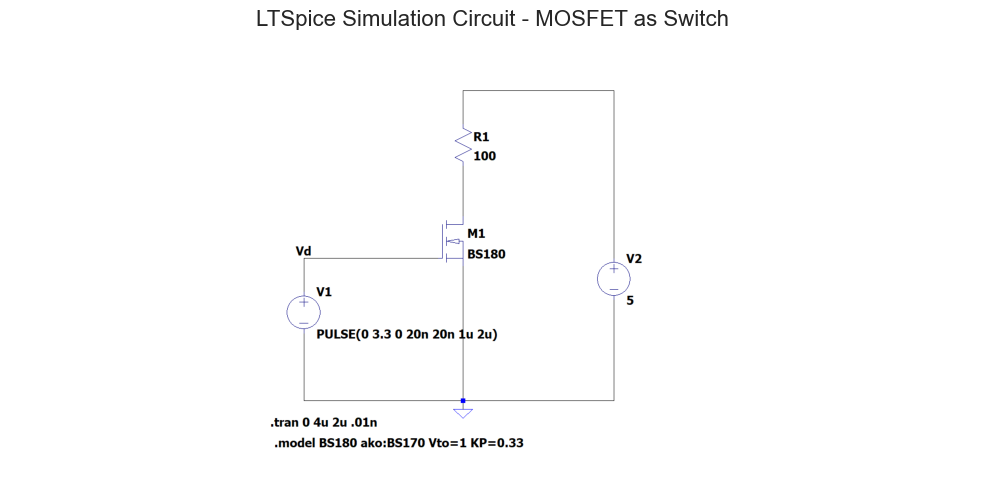

In [3]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is you have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/Task_1.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - MOSFET as Switch" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## Part 2: MOSFET as Current Mirror

**Objective:** Build an n-channel current mirror (Figure 2) that sources $I_{\rm out}=10\text{ mA}$.

1. **Supply voltage $V_b$**  
   Choose $V_b = 12\text{ V}$.

2. **Set bias resistor $R_V$**  
   - Diode‐connected device Q1 is biased at $I_{\rm in}=10\text{ mA}$.  
   - From a transfer curve (simulated): at $I_D=10$ mA, suppose $V_{GS1}=3.5$ V.  
   - Then  
     $$
       R_V = \frac{V_b - V_{GS1}}{I_{\rm in}}
       = \frac{12\text{ V} - 3.5\text{ V}}{0.01\text{ A}}
       = 850\;\Omega.
     $$

3. **Mirror accuracy**  
   $$
     \frac{I_{\rm out}}{I_{\rm in}}
     = \frac{g_{m,2}}{g_{m,1}}
     \approx 1
     \quad\text{(if }V_{\rm out}\ll V_A\text{).}
   $$

4. **Real‐source model**  
   - Short‐circuit current $I_0 = I_{\rm in}$.  
   - Output resistance $r_i$ from small‐signal slope:  
     simulate sweeping $V_{\rm out}$ or $R_L$ until $I_{\rm out}$ changes by ±10 %, then compute  
     $$
       r_i = \frac{\Delta V_{\rm out}}{\Delta I_{\rm out}}.
     $$


In [4]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is you have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = False
img_path = '../images/image_name_here.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## Part 3: MOSFET as Single-Ended Amplifier

**Objective:** Realize a common-source amplifier (Figure 4) with  
$$
  v_{\rm in}(t) = 0.1\sin(2\pi\cdot1\text{ kHz}\,t) + 0.1\text{ V}, 
  \quad
  A_u = \frac{v_{\rm out,pp}}{v_{\rm in,pp}} = -20.
$$


1. **Bias current $I_{D0}$**  
   Choose $I_{D0}=2\text{ mA}$. From the transfer characteristic at $I_{D0}$, read off:  
   - $V_{GS0}$,  
   - $g_m = \left.\frac{dI_D}{dV_{GS}}\right|_{I_{D0}}.$

2. **Drain resistor $R_D$**  
   $$
     |A_u| = g_m\,R_D
     \;\Longrightarrow\;
     R_D = \frac{20}{g_m}.
   $$

3. **Source resistor $R_S$**  
   $$
     R_S = \frac{V_{GS0} - V_{\rm th}}{I_{D0}}
     \quad\text{(or from a graphical load line).}
   $$

4. **Gate-bias divider $R_1, R_2$**  
   Target gate voltage:
   $
     V_G = V_{GS0} + I_{D0}R_S,
   $
    
   then choose

   $
     \frac{R_1}{R_2} = \frac{V_b - V_G}{V_G}.
   $

5. **Simulation action**  
   - Simulate the amplifier in SPICE.  
   - Export $I_D\!-\!V_{GS}$ (transfer) and $I_D\!-\!V_{DS}$ (output) curves.  
   - On the $I_D\!-\!V_{DS}$ plot, draw the DC load line:  
     $$I_D = \frac{V_b - V_{DS}}{R_D} - \frac{V_{GS}}{R_S}$$  
     and locate the operating point.  
   - Tweak $R_D, R_S, R_1, R_2$ to achieve $A_u=-20$ and $V_{DS0}\approx5\text{ V}$.

In [5]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is you have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = False
img_path = '../images/image_name_here.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)


# Experimental Setup

*Describe the experimental setup, including circuit diagrams, equipment used, and measurement procedures.*

In [6]:
from components.data_visualizing import insert_circut_diagram
# change to TRUE is you have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LAB_CIRCUIT_AVAILABLE = False
img_path = '../images/image_name_here.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit" # Enter Image Title Here

if IS_LAB_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

# Data Collection and Processing

*Import, process, and analyze experimental data.*

In [7]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if you want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/Mosfet_Switch.txt" # Enter path to simulation data
#oscilloscope_data_path_ch1 = "../data/tek0001CH1.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    #ch1_data = import_measurement_data(oscilloscope_data_path_ch1)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    cleaned_sim_data = process_sim_data (sim_data)
    #cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)
    

[ 25-05-2025, 21:33:19 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/Mosfet_Switch.txt


,time,V(vd),V(vd)*Id(M1),Id(M1)
0,0.000000e+00,0.000000,0.000000e+00,4.491302e-07
1,5.524459e-13,0.000091,3.669197e-11,4.025291e-07
2,1.657338e-12,0.000273,8.461383e-11,3.094186e-07
3,1.252957e-10,0.020674,-2.052304e-07,-9.927085e-06
4,2.489340e-10,0.041074,-8.157576e-07,-1.986062e-05


In [8]:
import numpy as np

# Extract time and power data
time = cleaned_sim_data["time"]
power = cleaned_sim_data["V(vd)*Id(M1)"]  

# Check time alignment (critical for edge detection)
pwm_period = 2e-6  # 2µs period (from V1's PULSE settings)
rise_time = 0.0     # Rising edge starts at t=0
fall_time = 1e-6    # Falling edge at 50% duty cycle (1µs for 2µs period)
edge_window = 20e-9 # 20ns transition time

# Define masks for BOTH rising and falling edges
mask_rise = (time >= rise_time) & (time <= rise_time + edge_window)
mask_fall = (time >= fall_time) & (time <= fall_time + edge_window)

# Combine masks to capture both edges in one period
mask_combined = mask_rise | mask_fall

# Check data sufficiency
if np.sum(mask_combined) < 2:
    print("⚠️ Insufficient data points. Reduce simulation timestep to ≤1ns.")
else:
    # Integrate power over BOTH edges
    E_sw_per_period = np.trapezoid(power[mask_combined], time[mask_combined])
    
    # Switching frequency and transitions per second
    f_pwm = 500e3  # 500 kHz
    transitions_per_second = 2 * f_pwm  # 2 edges per period
    
    # Average switching power
    P_sw = E_sw_per_period * transitions_per_second
    
    print(f"✅ Energy per period (both edges): {E_sw_per_period*1e9:.2f} nJ")
    print(f"✅ Switching power at {f_pwm/1e3:.0f} kHz: {P_sw*1e3:.2f} mW")
    
    #Constants (update with your values)
  
    f_pwm_range = np.linspace(10e3, 1e6, 50)  # Sweep from 10 kHz to 1 MHz

    # Calculate switching power for each frequency
    P_sw = E_sw_per_period * f_pwm_range  # P_sw = E_sw_per_period * f_pwm


✅ Energy per period (both edges): 166.47 nJ
✅ Switching power at 500 kHz: 166.47 mW


In [9]:
# Use the code below if you want to read multiple .csv files
from logger import logging
from components.data_import import get_multiple_oscilloscope_data_files
from components.data_processing import process_multiple_csv
import re
# By default all csv file from oscilliscope should be saved in the format 
# "xxxxCH1_5.csv"
# CH1 - channel 1 : 5 - measurement taken for maybe 5 micro amperes
# if not in this format, do rename it

#Put folder in the data folder

pattern = re.compile(r'.*?(CH\d+)_(\d+).csv$')
processed_data = {}
index = []

MULTIPLE_FILES = False

if MULTIPLE_FILES:   
    data_path = "../data/Enter_folder_name" # Enter path to the data folder
    data, index = get_multiple_oscilloscope_data_files(data_path)
    
    # Processed csv files
    processed_data = process_multiple_csv(data=data,value=index)
    print(processed_data)
    

# Data Visualization and Analysis

*Visualize and analyze the collected data.*

In [10]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = False

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    cleaned_sim_data,
                    x_label="",
                    y_label="",
                    title="",
                    label=""
               )

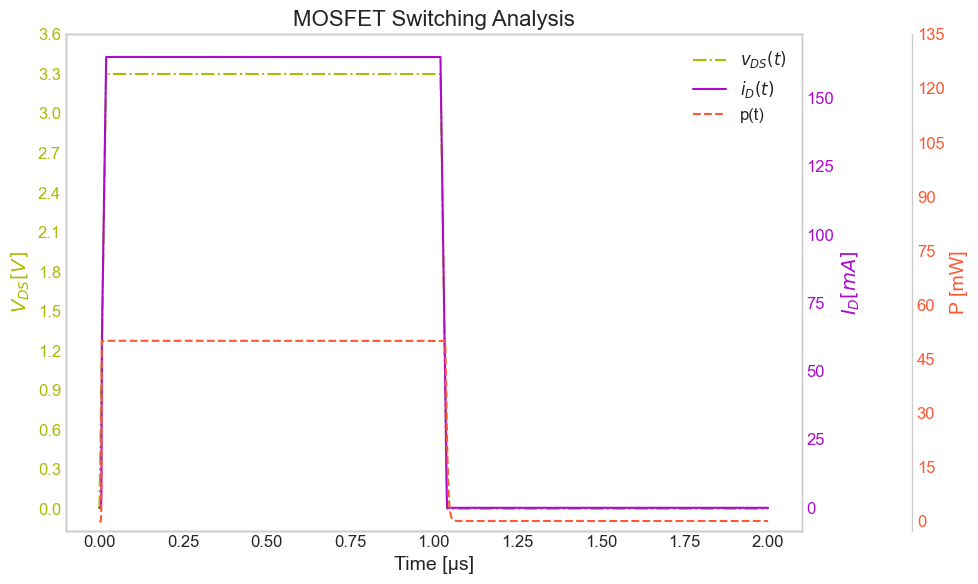

In [11]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data

PLOT_MULTI_SIM_DATA = True

if PLOT_MULTI_SIM_DATA:
    fig = plot_multiple_sim_data(
        sim_data=cleaned_sim_data,
        x_label='Time [µs]', 
        title='MOSFET Switching Analysis',
        y1_label='$V_{DS} [V]$', 
        y2_label='$I_D [mA]$', 
        y3_label='P [mW]', 
        label1="$v_{DS}(t)$", 
        label2="$i_D(t)$", 
        label3="p(t)"
    )

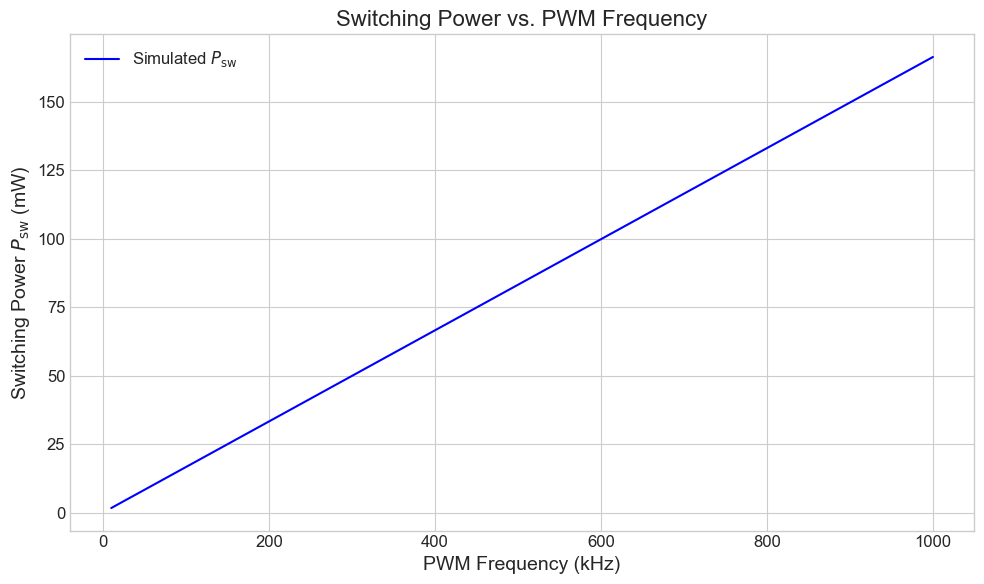

In [15]:
# Plot Scaling 
from components.data_visualizing import plot_two_variable
TWO_VARIABLES =True
if TWO_VARIABLES:
    fig, ax = plot_two_variable(
        x_data=f_pwm_range / 1e3,
        y_data=P_sw * 1e3,
        x_label='PWM Frequency (kHz)',
        y_label='Switching Power $P_{\\rm sw}$ (mW)',
        title='Switching Power vs. PWM Frequency',
        label='Simulated $P_{\\rm sw}$'
    )

In [ ]:
# For Plotting Single Values from oscilloscope
# Modify the "plot_single_oscillo_data" if necessary

from components.data_visualizing import plot_single_oscillo_data
# Function requires 6 arguments, hover cursor to see
PLOT_SINGLE_OSCI_DATA = False

if PLOT_SINGLE_OSCI_DATA:
     fig, ax = plot_single_oscillo_data(
                    ch1_data=cleaned_ch1_data,
                    ch2_data=cleaned_ch2_data,
                    x_label="",
                    y_label="",
                    title="",
                    label=""
                )

In [ ]:
# For Plotting Multiple Values from oscilloscope
from components.data_visualizing import plot_multiple_data

PLOT_MULTIPLE = False
if PLOT_MULTIPLE:

    fig, ax = plot_multiple_data(
                    processed_data= processed_data,
                    values=index,
                    x_label="",
                    y_label="",
                    title="",
                    values_unit=""
                )

# Discussion and Analysis

*Analyze and interpret the results, compare with theoretical predictions, and discuss any discrepancies.*

[Write your discussion here]

# Error Analysis

*Identify and quantify sources of error in the experiment.*

[Write your error analysis here]

# Conclusion

*Summarize the key findings and insights from the experiment.*

[Write your conclusion here]


# References
 
*List references and resources used in the experiment and analysis.*
 
1. [List your references here]
2. 
3. 